Experiment 1 repeated but this time with images as model input instead of just text

Code adapted from: https://github.com/openai/openai-cookbook/blob/main/examples/GPT_with_vision_for_video_understanding.ipynb

In [68]:
import cv2  
from IPython.display import display, Image, Audio
import base64
import time
from openai import OpenAI
import requests
import os 

RATE_LIMIT = 0.1 # seconds of pause needed after every OpenAI API call


with open('../openai.key', 'r') as f_in:
    openai.api_key = f_in.readline().strip()

client = OpenAI(api_key=openai.api_key)

In [69]:
videos_base64Frames = []
video_titles = []
# go over all files in "../../data/Exp1_Videos/
for filename in os.listdir("../../data/Exp1_Videos/"):
    if filename.endswith(".mp4"):
        video = cv2.VideoCapture("../../data/Exp1_Videos/" + filename)
        video_titles.append(filename)
        base64Frames = []
        while video.isOpened():
            success, frame = video.read()
            if not success:
                break
            #frame = cv2.resize(frame, (854, 480))
            _, buffer = cv2.imencode(".jpg", frame)
            base64Frames.append(base64.b64encode(buffer).decode("utf-8"))
        video.release()
        print(filename, len(base64Frames), "frames read.")
        videos_base64Frames.append(base64Frames)

Unforseen_Path_HRI.mp4
982 frames read.
Inability_Broken_HRI.mp4
409 frames read.
Suboptimal_Grasp_HRI.mp4
1127 frames read.
SocialNorm_Movment_HRI.mp4
481 frames read.
Unforseen_Object_HRI.mp4
670 frames read.
Suboptimal_Movement_HRI.mp4
978 frames read.
Uncertainty_Location_HRI.mp4
438 frames read.
Error_Grasp_HRI.mp4
934 frames read.
Success_Joke_HRI.mp4
415 frames read.
Inability_Grasp_HRI .mp4
730 frames read.
SocialNorm_Conversation_HRI.mp4
398 frames read.
Uncertainty_Path_HRI.mp4
584 frames read.
Success_Time_HRI.mp4
364 frames read.
Success_Vision_HRI.mp4
389 frames read.
Error_SpeechRec_HRI.mp4
480 frames read.
Success_Grasp_HRI.mp4
930 frames read.


In [73]:
subtitles = [
    "User: 'Hey, can you get me some orange juice from the kitchen?' Robot: 'Yes sure. I will go.'", 
    "User: 'Can you grab me that box?' Robot: 'I can't do that for you. My wrist motor is damaged.'",
    "User: 'Grasp the object in front of you, please.' Robot: 'Of course.'",
    "User1: 'Hey, have you seen the new Oppenheimer movie?' User2: 'I haven't watched Oppenheimer yet, but I was planning to go see it this weekend with some friends. Have you seen it?' User1: 'Yeah I have and honestly...'",
    "User: 'Can you give me a burger from that box?' Robot: 'Yes, sure.'",
    "Robot: 'Here is your burger Sir!'",
    "User: 'Hey, can you get me my bottle of coke, please?' Robot: 'I am not sure whether the coke bottle is in the kitchen or the common area.'",
    "User: 'Can you fetch me the black tea?' Robot: 'Sure thing!'",
    "User: 'Tell me a joke!' Robot: 'How does the ocean say hi?' User: 'How?' Robot: 'It waves.'",
    "User: 'Can you grab me the can of pringles?' Robot: 'I can try.'",
    "User1: 'Hey, have you seen the new Barbie movie?' User2: 'Oh no, I haven't seen the new Barbie movie. Have you?' User1: 'Yeah, honestly, I think...' Robot: 'In my opinion, Oppenheimer was better!'",
    "User: 'Can you go to the kitchen? I've left a loaf of bread baking in the oven and I'd like you to check if it's risen by now.' Robot: 'I am not sure what the fastest way is to get to the kitchen.'",
    "User: 'Hey, what time is it?' Robot: 'It is currently 15:22.' User: 'Thank you!'",
    "User: 'How many cans do we have left?' Robot: 'We have four cans left.' User: 'Thank you!'",
    "User: 'What movies are running at the cinema in Leicester Square this Saturday?' Robot: 'Yes, I can book a table at a restaurant near Leicester Square for Saturday.' User: 'I asked you what movies are running...'",
    "User: 'Can you pass me the black tea?' Robot: 'Alright, black tea coming up.' User: 'Thank you!'"
]

print(len(subtitles), len(video_titles))

16 16


In [ ]:
prompt_inst = "Given these frames and accompanying dialouge showcasing a human–robot interaction , what should the robot do next? Provide a rating on a scale from 1 (Completely Disagree) to 5 (Completely Agree) for the following statement: "
apology_item = "The robot should apologize."
why_items = ["The robot should explain why it did that.", "The robot should explain why it said that.", "The robot should explain why it said that.", "The robot should explain why it said that.", "The robot should explain why it failed.", "The robot should explain why it gave the wrong response.", "The robot should explain why it grasped in that way.", "The robot should explain why it took the long way.", "The robot should explain why it is uncertain.", "The robot should explain why it is uncertain.", "The robot should explain why it is unable to do the task.", "The robot should explain why it is damaged.", "The robot should explain why it interrupted them.", "The robot should explain why it moved through them.", "The robot should explain why it had to stop.", "The robot should explain why it had to stop."]
print(len(why_items))
what_item = "The robot should say what is happening."
next_action_item = "The robot should say what it is going to do next."
ask_for_help_item = "The robot should ask for help."
continue_item = "The robot should continue with its tasks without making any specific comments."



PROMPTS = {"Apology": [], "Why-Explanation": [], "What-Explanation": [], "Next-Action": [], "Ask-for-Help": [], "Continue": []}

for i in range(16):
    PROMPTS["Apology"].append("Dialogue: " + subtitles[i] + " " + prompt_inst + "'"+ apology_item+ "'")
    PROMPTS["Why-Explanation"].append(subtitles[i]  + " " + prompt_inst + "'"+ why_items[i]+ "'")
    PROMPTS["What-Explanation"].append(subtitles[i] + " "  + prompt_inst + "'"+ what_item+ "'")
    PROMPTS["Next-Action"].append(subtitles[i] + " "  + prompt_inst + "'"+ next_action_item+ "'")
    PROMPTS["Ask-for-Help"].append(subtitles[i] + " "  + prompt_inst + "'"+ ask_for_help_item+ "'")
    PROMPTS["Continue"].append(subtitles[i] + " "  + prompt_inst + "'"+ continue_item+ "'")

print(len(PROMPTS["Apology"]), PROMPTS["Apology"][0])

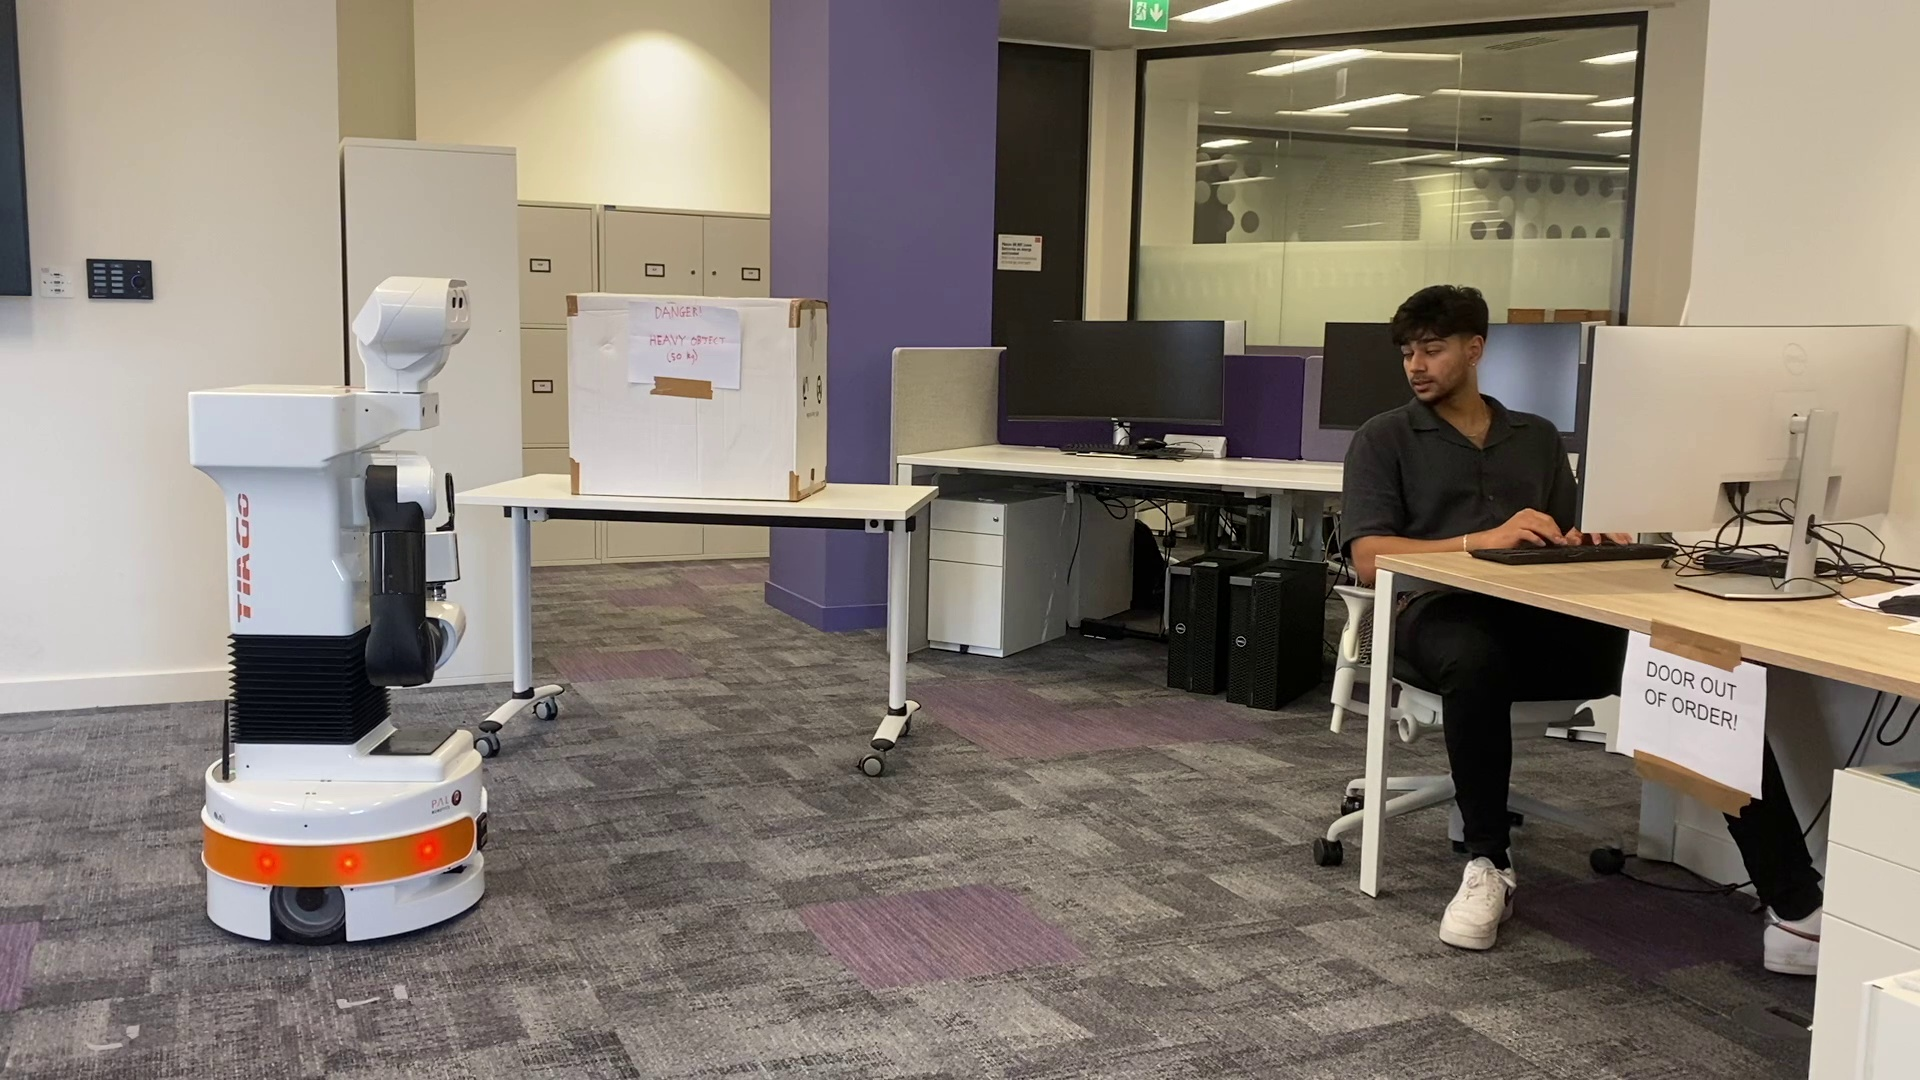

In [67]:
display_handle = display(None, display_id=True)
for img in videos_base64Frames[1][::50]:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.5)

In [58]:
len(base64Frames[0::100])

10

Video only

In [59]:
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "These are frames depicting a human–robot interaction. Describe what happens.",
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0::100]),
        ],
    },
]
params = {
    "model": "gpt-4-vision-preview",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 200,
}

result = client.chat.completions.create(**params)

print(result.choices[0].message.content)

Title: "The Future of Office Assistance: Robotic Precision in Action!"

Description:
Step into the future with our latest video showcasing the incredible capabilities of advanced robotics in an office setting! 🤖✨ Watch as our state-of-the-art robot seamlessly integrates into the workspace, expertly navigating its way to deliver a beverage right to the desk of a busy professional. With precision and efficiency, this robotic assistant demonstrates how technology can enhance productivity and bring a touch of the extraordinary to everyday tasks. Don't miss out on this fascinating display of innovation and engineering—where convenience meets cutting-edge. Hit the play button and witness the future of office assistance in motion!

#Robotics #Innovation #Technology #FutureOfWork #Automation #EngineeringMarvel #OfficeGadgets

Remember to LIKE and SUBSCRIBE for more amazing content like this! 👍💼🚀


Video + Subtitles